###  Use LASSO regression to predict Salary from other numeric predictors

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('Hitters.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 21 columns):
Unnamed: 0    263 non-null object
AtBat         263 non-null int64
Hits          263 non-null int64
HmRun         263 non-null int64
Runs          263 non-null int64
RBI           263 non-null int64
Walks         263 non-null int64
Years         263 non-null int64
CAtBat        263 non-null int64
CHits         263 non-null int64
CHmRun        263 non-null int64
CRuns         263 non-null int64
CRBI          263 non-null int64
CWalks        263 non-null int64
League        263 non-null object
Division      263 non-null object
PutOuts       263 non-null int64
Assists       263 non-null int64
Errors        263 non-null int64
Salary        263 non-null float64
NewLeague     263 non-null object
dtypes: float64(1), int64(16), object(4)
memory usage: 45.2+ KB


In [7]:
x = df.drop(['Unnamed: 0', 'League', 'Division', 'NewLeague', 'Salary'], axis = 1)
y = df.Salary


In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 16 columns):
AtBat      263 non-null int64
Hits       263 non-null int64
HmRun      263 non-null int64
Runs       263 non-null int64
RBI        263 non-null int64
Walks      263 non-null int64
Years      263 non-null int64
CAtBat     263 non-null int64
CHits      263 non-null int64
CHmRun     263 non-null int64
CRuns      263 non-null int64
CRBI       263 non-null int64
CWalks     263 non-null int64
PutOuts    263 non-null int64
Assists    263 non-null int64
Errors     263 non-null int64
dtypes: int64(16)
memory usage: 34.9 KB


In [9]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

In [32]:
alphas = 10**np.linspace(10,-2,100)*0.5

Text(0, 0.5, 'weights')

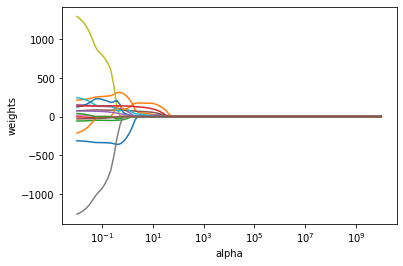

In [34]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [44]:
lasso2 = Lasso(alpha = 17, normalize = True)
lasso2.fit(X_train, y_train)             # Fit a ridge regression on the training data
pred2 = lasso2.predict(X_test)           # Use this model to predict the test data
print(pd.Series(lasso2.coef_, index = x.columns))

AtBat      0.000000
Hits       0.000000
HmRun      0.000000
Runs       0.000000
RBI        0.516704
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.000000
CRBI       0.208457
CWalks     0.000000
PutOuts    0.021337
Assists    0.000000
Errors     0.000000
dtype: float64


The final three predictors are RBI, CRBI and PutOuts

In [33]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))


111160.39367053009

In [31]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=x.columns)

AtBat      0.000000
Hits       0.951516
HmRun      0.000000
Runs       0.000000
RBI        0.402763
Walks      2.774631
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.268635
CRuns      0.000000
CRBI       0.492185
CWalks     0.000000
PutOuts    0.394770
Assists    0.000000
Errors    -0.000000
dtype: float64

After using cross-validation, variables left are Hits, RBI, Walks, CHmRun,  CRBI, PutOuts

### Ridge Regression

In [20]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 16)

Text(0, 0.5, 'weights')

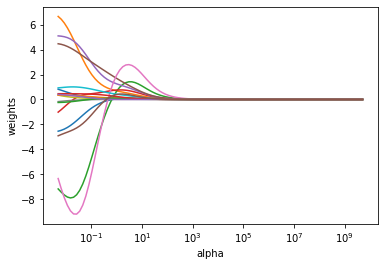

In [21]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [22]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_


0.5748784976988678

In [24]:
ridge = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge.fit(X_train, y_train)
mean_squared_error(y_test, ridge.predict(X_test))

104628.72833197894

In [27]:
ridge.fit(x, y)
pd.Series(ridge.coef_, index = x.columns)

AtBat      0.046181
Hits       0.945478
HmRun      0.093945
Runs       1.128396
RBI        0.928647
Walks      1.769113
Years      0.774010
CAtBat     0.011170
CHits      0.061145
CHmRun     0.417670
CRuns      0.123833
CRBI       0.128025
CWalks     0.047186
PutOuts    0.183886
Assists    0.038948
Errors    -1.512571
dtype: float64

### Short Answer. 

Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

The bias–variance tradeoff is about choosing a set of predictive models when models with a lower bias in parameter estimation have a higher variance of the parameter estimates across samples, and vice versa. 

Regularization attemts to reduce the variance of the estimator by simplifying it, something that will increase the bias, in such a way that the expected error decreases.

Lasso regression uses L1 regularization and ridge uses L2 as regularizer. Both of them use a penalty on coefficients. In number (1), after fitting with Lasso regression, we can shink the number of features to 3 which could reduce our model complexity and variance but increase the bias.
